# Recommendation system: recommends similar cars to the customer 


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

## Data Ingestion

In [52]:
B=pd.read_csv("D:Hitesh/dataset/Cars93.csv")

In [53]:
B.head()

,id,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,...,Passengers,Length,Wheelbase,Width,TurnCircle,RearseatRoom,LuggageRoom,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Missing Data Treatment

In [54]:
from hiteshmodule import MDT

In [55]:
B.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
MinPrice              0
Price                 0
MaxPrice              0
MPGcity               0
MPGhighway            0
AirBags               4
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev_per_mile          0
Man_trans_avail       0
Fueltank_capacity     0
Passengers            0
Length                0
Wheelbase             0
Width                 0
TurnCircle            0
RearseatRoom          2
LuggageRoom          11
Weight                0
Origin                0
Make                  0
dtype: int64

In [56]:
MDT(B)

missing data is replaced with mean value of column for continuous data and with column mode for categorical data


,missing
id,0
Manufacturer,0
Model,0
Type,0
MinPrice,0
Price,0
MaxPrice,0
MPGcity,0
MPGhighway,0
AirBags,0


## Variable selection (based on which variable clusters are to be formed)

In [57]:
A=B[["Price","MPGcity"]]

here we are selecting Price and Mileage of the car to form the clusters

## Preprocessing

In [58]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [63]:
x=pd.DataFrame(mm.fit_transform(A),columns=A.columns)

In [64]:
x

,Price,MPGcity
0,0.155963,0.322581
1,0.486239,0.096774
2,0.398165,0.161290
3,0.555963,0.129032
4,0.414679,0.225806
...,...,...
88,0.225688,0.064516
89,0.231193,0.193548
90,0.291743,0.096774
91,0.280734,0.193548


## Elbow Curve


In [65]:
wcss=[]
k=range(1,30,1)
for i in k:
    km=KMeans(n_clusters=i)
    m1=km.fit(x)
    wcss.append(m1.inertia_)

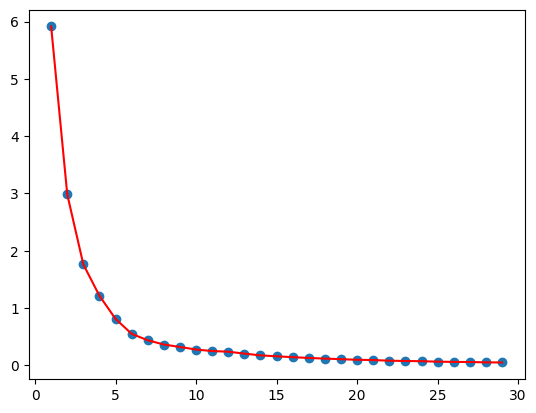

In [66]:
plt.scatter(k,wcss)
plt.plot(k,wcss,"red")
#plt.xticks(range(1,30,1))

### From elbow curve we can see that number of clusters that are to be created are 4

## K-Means Clustering 

In [67]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,random_state=31)
model=km.fit(x)
m=model.labels_

In [68]:
m

array([0, 3, 2, 3, 2, 0, 2, 2, 2, 3, 3, 0, 0, 2, 0, 2, 2, 2, 3, 2, 0, 2,
       1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 3, 2, 3, 3, 3, 1, 1, 0, 2, 3, 3, 3, 0, 2, 1, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 2, 2, 2, 2])

In [69]:
w=pd.DataFrame(A)

In [70]:
w

,Price,MPGcity
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22
...,...,...
88,19.7,17
89,20.0,21
90,23.3,18
91,22.7,21


In [71]:
w["cars"]=B.Make

In [72]:
w["clusters"]=m

In [73]:
w

,Price,MPGcity,cars,clusters
0,15.9,25,Acura Integra,0
1,33.9,18,Acura Legend,3
2,29.1,20,Audi 90,2
3,37.7,19,Audi 100,3
4,30.0,22,BMW 535i,2
...,...,...,...,...
88,19.7,17,Volkswagen Eurovan,2
89,20.0,21,Volkswagen Passat,2
90,23.3,18,Volkswagen Corrado,2
91,22.7,21,Volvo 240,2


# Creating Recommendation system


In [74]:
cn=w[w.cars=="Audi 100"].clusters.values[0]  

will give the number/label of cluster in which the given input belongs

In [75]:
cn

3

In [76]:
w[w.clusters==cn]   #will give all the rows that particular cluster number/label

,Price,MPGcity,cars,clusters
1,33.9,18,Acura Legend,3
3,37.7,19,Audi 100,3
9,34.7,16,Cadillac DeVille,3
10,40.1,16,Cadillac Seville,3
18,38.0,17,Chevrolet Corvette,3
47,47.9,17,Infiniti Q45,3
49,35.2,18,Lexus SC300,3
50,34.3,17,Lincoln Continental,3
51,36.1,18,Lincoln Town_Car,3
56,32.5,17,Mazda RX-7,3


In [77]:
similarcars=list(w[w.clusters==cn].cars)

In [78]:
similarcars

['Acura Legend',
 'Audi 100',
 'Cadillac DeVille',
 'Cadillac Seville',
 'Chevrolet Corvette',
 'Infiniti Q45',
 'Lexus SC300',
 'Lincoln Continental',
 'Lincoln Town_Car',
 'Mazda RX-7',
 'Mercedes-Benz 190E',
 'Mercedes-Benz 300E']

## Recommendation function

In [80]:
a=input("Enter name of the car you wish to buy and we will suggest you similar cars :")
cnum=w[w.cars==a].clusters.values[0]
suggest=list(w[w.clusters==cnum].cars)
print("---------------there are",len(suggest),"suggestion for you--------------- \n",suggest)
print("-----cluster number is---->",cnum)


Enter name of the car you wish to buy and we will suggest you similar cars :BMW 535i
---------------there are 35 suggestion for you--------------- 
 ['Audi 90', 'BMW 535i', 'Buick LeSabre', 'Buick Roadmaster', 'Buick Riviera', 'Chevrolet Camaro', 'Chevrolet Lumina_APV', 'Chevrolet Astro', 'Chevrolet Caprice', 'Chrylser Concorde', 'Chrysler Imperial', 'Dodge Caravan', 'Dodge Stealth', 'Eagle Vision', 'Ford Aerostar', 'Ford Taurus', 'Ford Crown_Victoria', 'Lexus ES300', 'Mazda MPV', 'Mercury Cougar', 'Mitsubishi Diamante', 'Nissan Quest', 'Nissan Maxima', 'Oldsmobile Silhouette', 'Oldsmobile Eighty-Eight', 'Pontiac Firebird', 'Pontiac Grand_Prix', 'Pontiac Bonneville', 'Saab 900', 'Toyota Previa', 'Volkswagen Eurovan', 'Volkswagen Passat', 'Volkswagen Corrado', 'Volvo 240', 'Volvo 850']
-----cluster number is----> 2


### User input of car name was taken and list of similar cars were given as an output 

## Plotting clusters

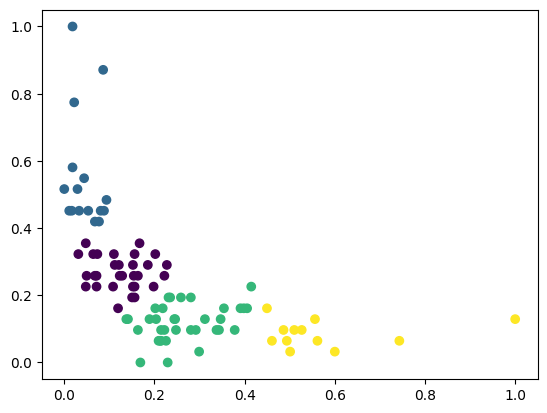

In [81]:
plt.scatter(x.Price,x.MPGcity,c=w.clusters)


In [82]:
w1=pd.DataFrame(model.cluster_centers_)

In [83]:
w1

,0,1
0,0.126300,0.268817
1,0.046216,0.552419
2,0.264220,0.118894
3,0.574006,0.086022


# Conclusion

## A recommendation system which gives the list of similar cars to the customers on the basis of car they are looking for